# K-Means Clustering

## Objetivo

*   Aprender a usar o algoritmo do Kmeans do Scikit-learn


In [1]:
import random 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, davies_bouldin_score

np.random.seed(65876)

## Coletar os dados 

In [2]:
X = pd.read_csv("https://raw.githubusercontent.com/EduPekUfpr/DS02_PPGOLD/main/Data/cluster_data.csv", sep="\t")
X.head()

,x,y
0,-5.470357,6.567679
1,-0.437412,2.034206
2,-0.842431,-0.074775
3,3.299763,-4.639278
4,7.802927,0.088883


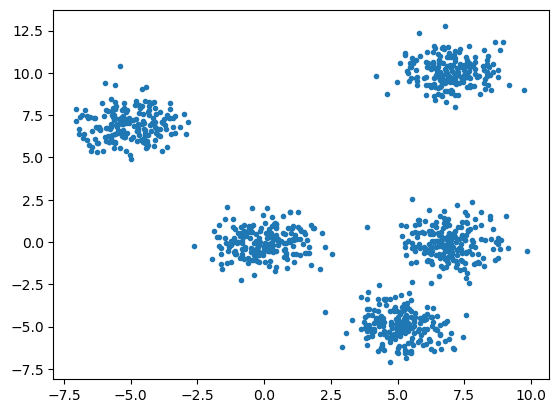

In [3]:
plt.scatter(X["x"], X["y"], marker='.')

## K-Means

Nós Usaremos 3 parâmetros para o KMeans:

* init: k-means++ - Seleção automática nos centróides iniciais
* n_clusters: 5 Número de CLusters
* n_init: 30 quantas reinicializações com diferentes centróides

In [4]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 5)

In [5]:
k_means.fit(X)

KMeans(n_clusters=5, n_init=5)

In [8]:
k_means_labels = k_means.labels_
X_plot = X.copy()
X_plot["k_means_labels"] = k_means_labels
X_plot.head()


,x,y,k_means_labels
0,-5.470357,6.567679,3
1,-0.437412,2.034206,0
2,-0.842431,-0.074775,0
3,3.299763,-4.639278,2
4,7.802927,0.088883,4


In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 9.14612289e-03, -2.37509333e-03],
       [ 6.98993562e+00,  1.00645504e+01],
       [ 5.09623720e+00, -4.97790894e+00],
       [-5.06993027e+00,  6.94666556e+00],
       [ 6.93060597e+00, -3.74844780e-02]])

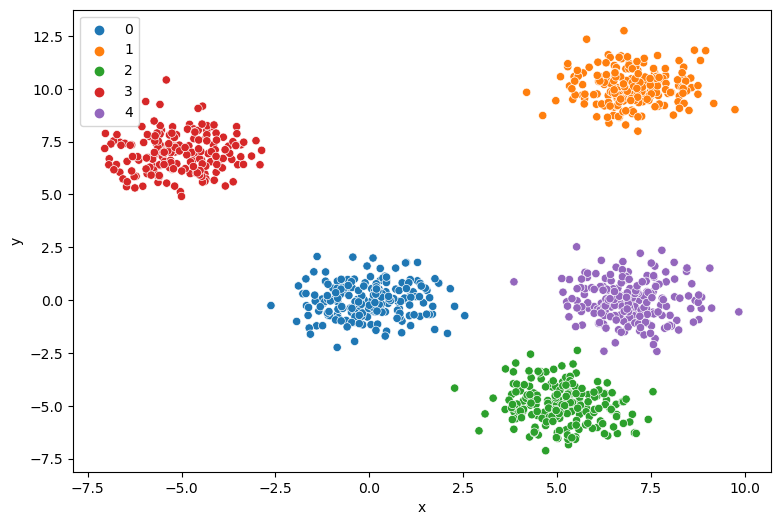

In [11]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=X_plot, x="x", y="y",hue="k_means_labels", palette = "tab10")
plt.legend()
plt.show()

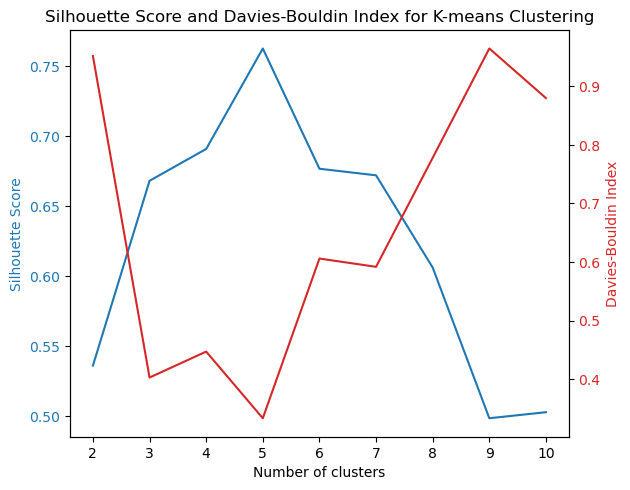

The optimal number of clusters according to the Silhouette score is: 5
The optimal number of clusters according to the Davies-Bouldin index is: 5


In [12]:
# Range of clusters to try
cluster_range = range(2, 11)

# Lists to store evaluation metrics
silhouette_scores = []
davies_bouldin_indices = []

# Perform K-means and compute metrics for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin_avg = davies_bouldin_score(X, labels)
    
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_indices.append(davies_bouldin_avg)

# Plot the evaluation metrics
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Silhouette Score', color='tab:blue')
ax1.plot(cluster_range, silhouette_scores, label='Silhouette Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Davies-Bouldin Index', color='tab:red')
ax2.plot(cluster_range, davies_bouldin_indices, label='Davies-Bouldin Index', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Silhouette Score and Davies-Bouldin Index for K-means Clustering')
plt.show()

# Find the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f'The optimal number of clusters according to the Silhouette score is: {optimal_clusters}')
optimal_clusters_db = cluster_range[np.argmin(davies_bouldin_indices)]
print(f'The optimal number of clusters according to the Davies-Bouldin index is: {optimal_clusters_db}')